In [20]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
data_dir = os.path.join(os.path.expanduser('~'), 'data','ofij')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# files
kospicode_filename = 'kospi_code.csv'
stinfo_filename = os.path.join(data_dir, 'stock_info.feather')
stprc_filename = os.path.join(data_dir, 'stock_prices.feather')


dfstcode = pd.read_csv(kospicode_filename)
dfstinfo = pd.read_feather(stinfo_filename)
dfstprc = pd.read_feather(stprc_filename)

df = dfstinfo.merge(dfstcode, how='left', on='단축코드')

dfmeta = pd.DataFrame({
    '한글명': df['한글명'],  # Company Name
    '표준코드': df['표준코드'],  # Standard Product Code
    '단축코드': df['단축코드'],  # Short Stock Code
    '상장일자': pd.to_datetime(df['상장일자'], format='%Y%m%d'),  # Listed Date
    '시장구분': df['KOSPI'].apply(lambda x: 'KOSPI' if x == 'Y' else 'Other'),  # Market (KOSPI or Others)
    '업종대분류': df['idx_bztp_lcls_cd_name'],  # Industry Size Category
    '업종중분류': df['idx_bztp_mcls_cd_name'],  # Industry Medium Category
    '표준산업분류': df['std_idst_clsf_cd_name'],  # Industry Detailed Category
    '액면가': df['액면가'],  # Face value
    '시가총액(억 원)': df['시가총액'],  # Market Cap in Hundred-Million KRW
    '매출액(억 원)': df['매출액'],  # Sales
    '영업이익(억 원)': df['영업이익'],  # Operating Profit
    '당기순이익(억 원)': df['당기순이익'],  # Net Profit
    'ROE(%)': df['ROE'],  # Return on Equity
    '전일종가(원)': df['기준가'],  # Previous Closing Price 
    '신용가능': df['신용가능'].apply(lambda x: True if x == 'Y' else False),  # Credit investment possibility
    '증거금비율(%)': df['증거금비율'],  # Margin Rate Requirement
    'KRX바이오': df['KRX바이오'].apply(lambda x: True if x == 'Y' else False),  # Part of KRX Bio
    '관리종목': df['관리종목'].apply(lambda x: True if x == 'Y' else False),  # Admin-Managed Issue 
    '거래정지': df['거래정지'].apply(lambda x: True if x == 'Y' else False),  # Trading Suspension
    '불성실공시': df['불성실공시'].apply(lambda x: True if x == 'Y' else False),  # Unfaithful Disclosure
    '이상급등': df['이상급등'].apply(lambda x: True if x == 'Y' else False),  # Sudden Price Surge
}).reset_index(drop=True)



In [3]:
dfmeta.head()

,한글명,표준코드,단축코드,상장일자,시장구분,업종대분류,업종중분류,표준산업분류,액면가,시가총액(억 원),...,당기순이익(억 원),ROE(%),전일종가(원),신용가능,증거금비율(%),KRX바이오,관리종목,거래정지,불성실공시,이상급등
0,동화약품,KR7000020008,000020,1976-03-24,KOSPI,시가총액규모중,의약품,의약품 제조업,1000,1726,...,21,1.49,6180,True,60,True,False,False,False,False
1,KR모터스,KR7000040006,000040,1976-05-25,KOSPI,시가총액규모소,운수장비,그외 기타 운송장비 제조업,500,276,...,-142,-42.76,460,False,100,False,False,False,False,False
2,경방,KR7000050005,000050,1956-03-03,KOSPI,시가총액규모중,"섬유,의복",종합 소매업,500,1781,...,236,3.15,6500,True,60,False,False,False,False,False
3,삼양홀딩스,KR7000070003,000070,1968-12-27,KOSPI,시가총액규모중,음식료품,기타 금융업,5000,4958,...,895,1.38,57900,True,60,False,False,False,False,False
4,삼양홀딩스우,KR7000071001,000075,1992-02-21,Other,시가총액규모중,음식료품,기타 금융업,5000,174,...,0,0.00,57400,False,100,False,False,False,False,False


In [7]:
dfstprc[dfstprc['STOCK_CODE'] == '005930'].groupby('PERIOD_CODE').agg({
    'stck_bsop_date': ['min','max']
})

stck_bsop_date          
                       min       max
PERIOD_CODE                         
D                 20250311  20250421
M                 20221130  20250421
W                 20240930  20250421

In [5]:
dfstprc.head()

,stck_bsop_date,stck_oprc,stck_hgpr,stck_lwpr,stck_clpr,acml_vol,prdy_vrss_vol_rate,prdy_vrss,prdy_vrss_sign,prdy_ctrt,hts_frgn_ehrt,frgn_ntby_qty,flng_cls_code,acml_prtt_rate,PERIOD_CODE,STOCK_CODE
0,20250421,6190,6250,6140,6150,48772,39.90,-30,5,-0.49,3.18,14805,00,1.00,D,000020
1,20250418,6120,6200,6050,6180,34863,-8.13,70,2,1.15,3.12,11497,00,0.00,D,000020
2,20250417,6030,6120,5950,6110,37949,14.88,80,2,1.33,3.08,8178,00,0.00,D,000020
3,20250416,6070,6120,6010,6030,33035,4.54,-30,5,-0.50,3.05,-3057,00,0.00,D,000020
4,20250415,6040,6080,6000,6060,31599,45.83,50,2,0.83,3.06,6858,00,0.00,D,000020


In [14]:
dfhmm = dfstprc[(dfstprc['STOCK_CODE'] == '011200') & (dfstprc['PERIOD_CODE'] == 'W')].set_index('stck_bsop_date') #.acml_vol

In [15]:
dfhmm.index = pd.to_datetime(dfhmm.index, format='%Y%m%d')

In [16]:
dfhmm.sort_index(inplace=True)

In [17]:
dfhmm.drop(columns=['STOCK_CODE', 'PERIOD_CODE'], inplace=True)

In [18]:
dfhmm = dfhmm.astype(float)

<Axes: xlabel='stck_bsop_date'>

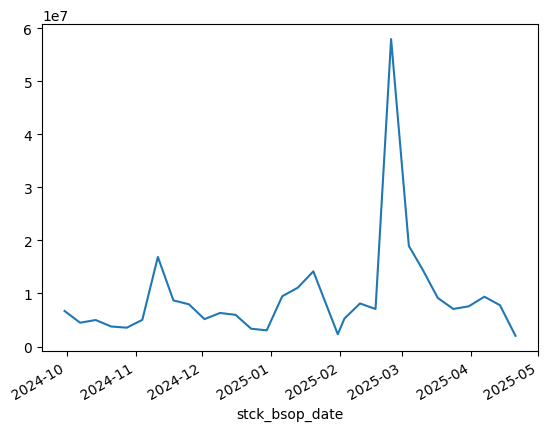

In [19]:
dfhmm['acml_vol'].plot()